# Preparatory

In [113]:
# Install libraries
!pip install pydub
!pip install simpleaudio

In [114]:
# Import required libraries
import numpy as np              # Math library
import matplotlib.pyplot as plt # Do plotting
from pydub import AudioSegment  # Do audio working
import scipy.signal             # Signal processing
import simpleaudio as sa        # Play sound https://simpleaudio.readthedocs.io/en/latest
import soundfile as sf          # Save sound files locally
rng1 = np.random.default_rng()  # Generate random signals

# 1. I choose Gsp_ME_p_L-sus_F#5 and Gsp_ME_f_L-sus_F#6 wav files to plot the time domain waveforms of each one with labeling the axes amplitude and time in seconds by using python.

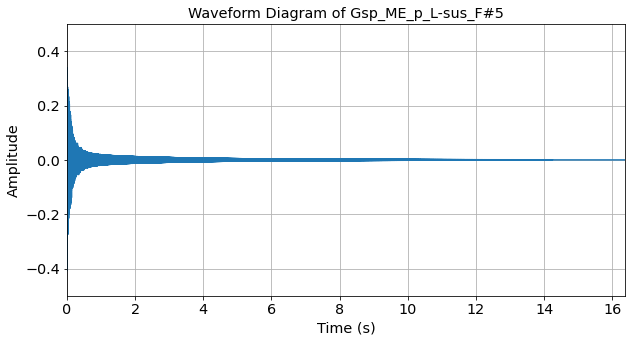

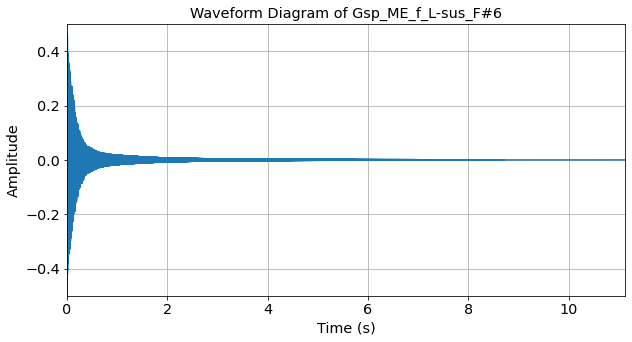

In [115]:
# Use Gsp_ME_p_L-sus_F#5.wav to plot the time domain waveform diagram

sound1 = AudioSegment.from_wav("Gsp_ME_p_L-sus_F#5.wav")          # Load sound file Gsp_ME_p_L-sus_F#5.wav
sound1 = sound1.set_channels(1)                                   # Set laptop audio channel to 1
ydata1 = sound1.get_array_of_samples()/(np.power(2,16)/2)         # Convert the 16-bit samples in [-32768,32768) to floating point numbers in [-1,1)
params1 = {'legend.fontsize': 'x-large','figure.figsize': (10, 5),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'} # Plot the time domain waveform diagram
plt.rcParams.update(params1)
fig, ax = plt.subplots()
times1 = np.arange(len(ydata1))/sound1.frame_rate                 # Time position of each sample index
plt.plot(times1,ydata1)
plt.xlabel('Time (s)'); plt.ylabel('Amplitude')
plt.xlim((0,times1[-1])); plt.ylim((-0.5,0.5))
ax.grid()
plt.title('Waveform Diagram of Gsp_ME_p_L-sus_F#5')               # Add diagram title
plt.show()

# Use Gsp_ME_f_L-sus_F#6.wav to plot the time domain waveform diagram
sound2 = AudioSegment.from_wav('Gsp_ME_f_L-sus_F#6.wav')
sound2 = sound2.set_channels(1)
ydata2 = sound2.get_array_of_samples()/(np.power(2,16)/2)
params2 = {'legend.fontsize': 'x-large','figure.figsize': (10, 5),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params2)
fig, ax = plt.subplots()
times2 = np.arange(len(ydata2))/sound2.frame_rate
plt.plot(times2,ydata2)
plt.xlabel('Time (s)'); plt.ylabel('Amplitude')
plt.xlim((0,times2[-1])); plt.ylim((-0.5,0.5))
ax.grid()
plt.title('Waveform Diagram of Gsp_ME_f_L-sus_F#6')
plt.show()

# (part I) Use Gsp_ME_p_L-sus_F#5.wav. (part II) Use Gsp_ME_f_L-sus_F#6.wav

## part I. Use Gsp_ME_p_L-sus_F#5

### Compute and plot the magnitude spectra at two different times of each sound using a rectangular window of size 100 ms. (Do the first spectral analysis as close as possible to the attack and the second analysis about 500-1000 ms later)

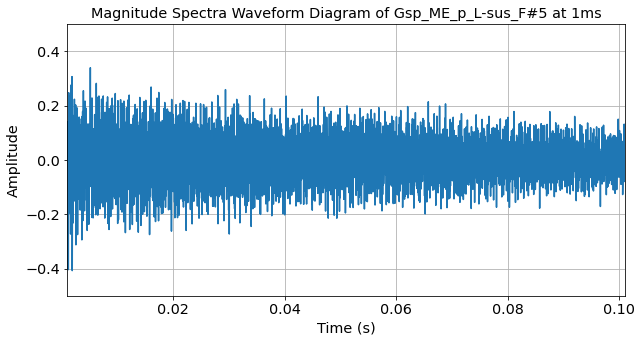

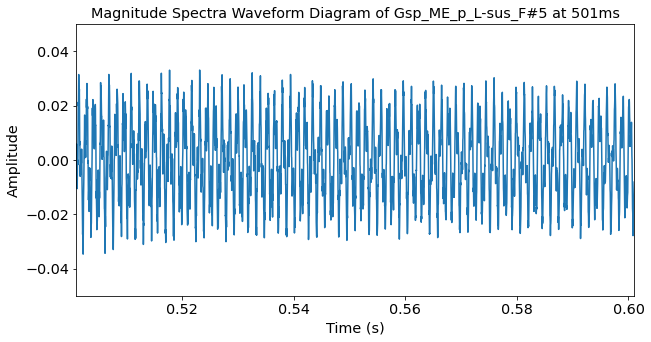

In [116]:
windowlen_seconds = 100/1000
timetotakewindow1_seconds = 1/1000
timetotakewindow2_seconds = 501/1000

fig, ax = plt.subplots()

# Plot the magnitude spectra waveform diagram at 1ms
plt.plot(times1,ydata1)
plt.xlabel('Time (s)'); plt.ylabel('Amplitude')
plt.xlim((timetotakewindow1_seconds,timetotakewindow1_seconds+windowlen_seconds))
plt.ylim((-0.5,0.5))
ax.grid();
plt.title('Magnitude Spectra Waveform Diagram of Gsp_ME_p_L-sus_F#5 at 1ms')     # Add plot title
plt.show()

# Plot the magnitude spectra waveform diagram at 501ms
plt.plot(times1,ydata1)
plt.xlabel('Time (s)'); plt.ylabel('Amplitude')
plt.xlim((timetotakewindow2_seconds,timetotakewindow2_seconds+windowlen_seconds))
plt.ylim((-0.05,0.05))
ax.grid();
plt.title('Magnitude Spectra Waveform Diagram of Gsp_ME_p_L-sus_F#5 at 501ms')
plt.show()

### Locate the partials below 15kHz having the most energy, and estimate their frequencies and amplitudes at these time positions. (Do the first spectral analysis as close as possible to the attack and the second analysis about 500-1000 ms later)

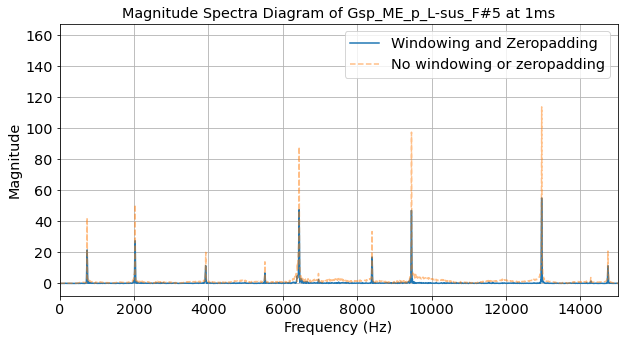

Max Energy: 83 at Frequency: 6245




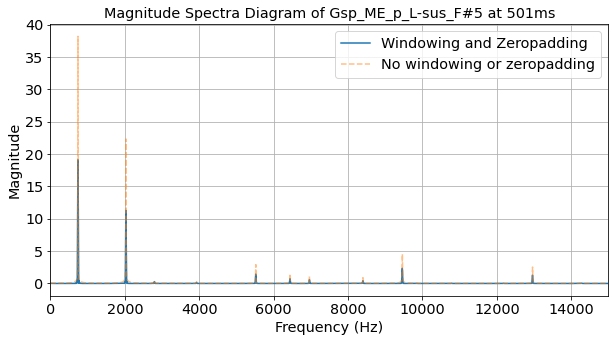

Max Energy: 19 at Frequency: 275


In [117]:
# Plot the magnitude spectra diagram at 1ms
windowlen_samples = int(windowlen_seconds*sound1.frame_rate)
timetotakewindow_samples = int(timetotakewindow1_seconds*sound1.frame_rate)

# The following takes the Fourier transform of the 100 ms segment of sound
YDATA_nowindoworZP = \
    np.fft.fft(ydata1[timetotakewindow_samples:timetotakewindow_samples+windowlen_samples])
# The following does the same but shapes the segment with a Hann window and "zero pads" it
Y1DATA = np.fft.fft(np.hanning(windowlen_samples)* \
                   ydata1[timetotakewindow_samples:timetotakewindow_samples+windowlen_samples], \
                n=8192*2)

fig, ax = plt.subplots()
freqs = sound1.frame_rate*np.arange(len(Y1DATA))/len(Y1DATA) # Frequency (Hz) of each Fourier sample index
plt.plot(freqs,np.abs(Y1DATA),'-')
freqs = sound1.frame_rate*np.arange(len(YDATA_nowindoworZP))/len(YDATA_nowindoworZP)
plt.plot(freqs,np.abs(YDATA_nowindoworZP),'--',alpha=0.5)
plt.xlabel('Frequency (Hz)'); plt.ylabel('Magnitude')
plt.legend(['Windowing and Zeropadding','No windowing or zeropadding'])
plt.xlim((0,15000))
ax.grid();
plt.title('Magnitude Spectra Diagram of Gsp_ME_p_L-sus_F#5 at 1ms')
plt.show()
print("Max Energy: %d at Frequency: %d" % (np.abs(Y1DATA).max(), np.abs(Y1DATA).argmax()))

print("\n")

# Plot the magnitude spectra diagram at 501ms
windowlen_samples = int(windowlen_seconds*sound1.frame_rate)
timetotakewindow_samples = int(timetotakewindow2_seconds*sound1.frame_rate)

YDATA_nowindoworZP = \
    np.fft.fft(ydata1[timetotakewindow_samples:timetotakewindow_samples+windowlen_samples])
Y2DATA = np.fft.fft(np.hanning(windowlen_samples)* \
                   ydata1[timetotakewindow_samples:timetotakewindow_samples+windowlen_samples], \
                n=8192*2)

fig, ax = plt.subplots()
freqs = sound1.frame_rate*np.arange(len(Y2DATA))/len(Y2DATA)
plt.plot(freqs,np.abs(Y2DATA),'-')
freqs = sound1.frame_rate*np.arange(len(YDATA_nowindoworZP))/len(YDATA_nowindoworZP)
plt.plot(freqs,np.abs(YDATA_nowindoworZP),'--',alpha=0.5)
plt.xlabel('Frequency (Hz)'); plt.ylabel('Magnitude')
plt.legend(['Windowing and Zeropadding','No windowing or zeropadding'])
plt.xlim((0,15000))
ax.grid();
plt.title('Magnitude Spectra Diagram of Gsp_ME_p_L-sus_F#5 at 501ms')
plt.show()
print("Max Energy: %d at Frequency: %d" % (np.abs(Y2DATA).max(), np.abs(Y2DATA).argmax()))

### Compute the parameters of an exponential amplitude envelope for each of the partials you found from your spectral analysis at the two time positions. Plot the amplitude envelopes of these partials.

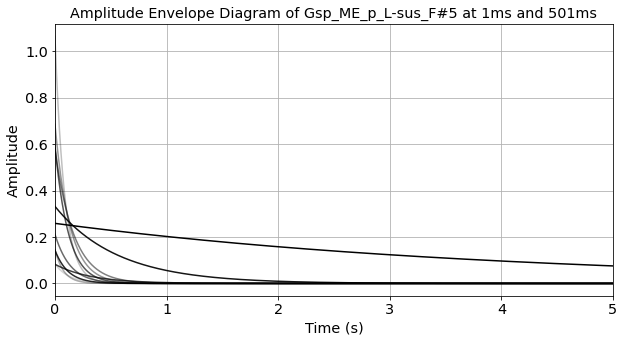

In [118]:
Y1DATAdB = 20*np.log10(np.abs(Y1DATA)/np.max(np.abs(Y1DATA)))
Y2DATAdB = 20*np.log10(np.abs(Y2DATA)/np.max(np.abs(Y1DATA)))
peaks, props = scipy.signal.find_peaks(Y1DATAdB[0:int(len(Y1DATAdB)/2)], height=-22)
freqs = np.arange(len(Y1DATA))/len(Y1DATA)*sound1.frame_rate

fig, ax = plt.subplots()
counter = 0
for ii in peaks:
    amp1 = Y1DATAdB[ii]
    amp2 = Y2DATAdB[ii]
    gamma = (np.log(10)/20)*(amp1-amp2)/(timetotakewindow2_seconds-timetotakewindow1_seconds)
    A = np.power(10,amp1/20)*np.power(10,gamma*timetotakewindow1_seconds/np.log10(np.exp(1)))
    et = np.arange(0,5*sound1.frame_rate)/sound1.frame_rate
    envelope = A*np.exp(-gamma*et)
    plt.plot(et,envelope,color='k',alpha=1-(counter/(len(peaks)+1)))
    counter += 1

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim((0,5))
ax.grid();
plt.title('Amplitude Envelope Diagram of Gsp_ME_p_L-sus_F#5 at 1ms and 501ms')
plt.show()

### Make an additive synthesis of the sound sample you have chosen. Play and write the result to an audio file.

In [119]:
tonedur = 5
N = int(tonedur*sound1.frame_rate)
n = np.arange(N)    
ysum = np.zeros((N,))
for ii in peaks:
    amp1 = np.abs(Y1DATA[ii])
    amp2 = np.abs(Y2DATA[ii])
    m = (amp2-amp1)/(timetotakewindow2_seconds-timetotakewindow1_seconds)
    b = amp1
    et = np.arange(0,N)/sound1.frame_rate
    envelope = m*et+b
    envelope[envelope < 0] = 0 # rectify
    ysum += envelope*np.cos(2*np.pi*freqs[ii]*n/sound1.frame_rate 
                    + np.angle(Y1DATA[ii]))   

# Normalize
ysum /= np.max(np.abs(ysum))
ysum_scaled = np.int16(ysum / np.max(np.abs(ysum)) * (np.power(2,16)/2)) # Make 16-bit

# Save the sound wav file locally
sf.write('generatedSound_Gsp_ME_p_L-sus_F#5.wav', ysum_scaled, sound1.frame_rate, subtype='PCM_16')
print("generatedSound_Gsp_ME_p_L-sus_F#5.wav saved successfully!\n")

# Play Sound
play_obj = sa.play_buffer(ysum_scaled, 1, 2, sound1.frame_rate)
play_obj.wait_done()
print("Finished playing!")

generatedSound_Gsp_ME_p_L-sus_F#5.wav saved successfully!

Finished playing!


## part II. Use Gsp_ME_f_L-sus_F#6

### Compute and plot the magnitude spectra at two different times of each sound using a rectangular window of size 100 ms. (Do the first spectral analysis as close as possible to the attack and the second analysis about 500-1000 ms later)

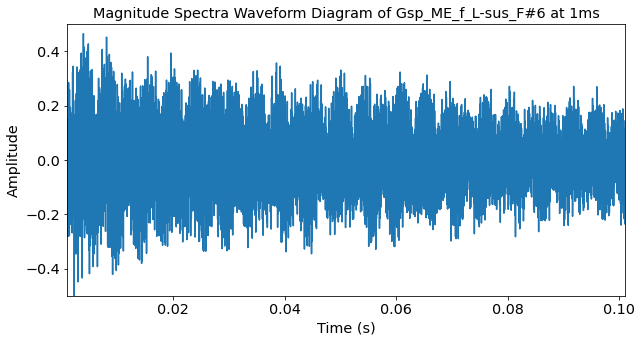

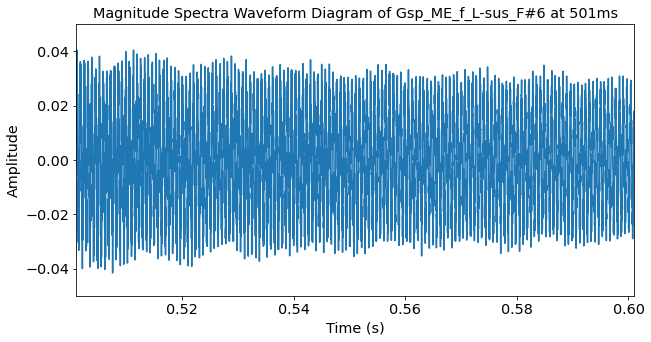

In [120]:
# Plot the magnitude spectra waveform diagram at 1ms
plt.plot(times2,ydata2)
plt.xlabel('Time (s)'); plt.ylabel('Amplitude')
plt.xlim((timetotakewindow1_seconds,timetotakewindow1_seconds+windowlen_seconds))
plt.ylim((-0.5,0.5))
ax.grid();
plt.title('Magnitude Spectra Waveform Diagram of Gsp_ME_f_L-sus_F#6 at 1ms')
plt.show()

# Plot the magnitude spectra waveform diagram at 501ms
plt.plot(times2,ydata2)
plt.xlabel('Time (s)'); plt.ylabel('Amplitude')
plt.xlim((timetotakewindow2_seconds,timetotakewindow2_seconds+windowlen_seconds))
plt.ylim((-0.05,0.05))
ax.grid();
plt.title('Magnitude Spectra Waveform Diagram of Gsp_ME_f_L-sus_F#6 at 501ms')
plt.show()

### Locate the partials below 15kHz having the most energy, and estimate their frequencies and amplitudes at these time positions. (Do the first spectral analysis as close as possible to the attack and the second analysis about 500-1000 ms later)

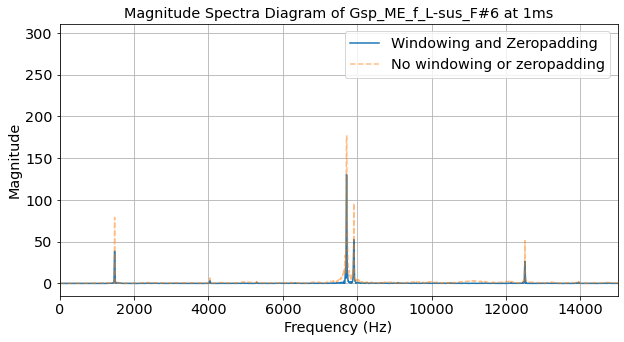

Max Energy: 147 at Frequency: 6710




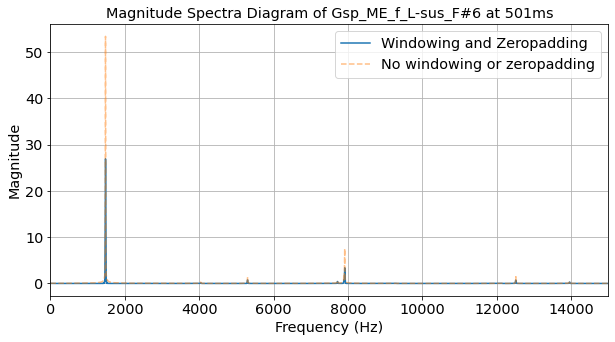

Max Energy: 26 at Frequency: 550


In [121]:
# Plot the magnitude spectra diagram at 1ms
windowlen_samples = int(windowlen_seconds*sound2.frame_rate)
timetotakewindow_samples = int(timetotakewindow1_seconds*sound2.frame_rate)

# The following takes the Fourier transform of the 100 ms segment of sound
YDATA_nowindoworZP = \
    np.fft.fft(ydata2[timetotakewindow_samples:timetotakewindow_samples+windowlen_samples])
# The following does the same but shapes the segment with a Hann window and "zero pads" it
Y1DATA = np.fft.fft(np.hanning(windowlen_samples)* \
                   ydata2[timetotakewindow_samples:timetotakewindow_samples+windowlen_samples], \
                n=8192*2)

fig, ax = plt.subplots()
freqs = sound2.frame_rate*np.arange(len(Y1DATA))/len(Y1DATA) # frequency (Hz) of each Fourier sample index
plt.plot(freqs,np.abs(Y1DATA),'-')

freqs = sound2.frame_rate*np.arange(len(YDATA_nowindoworZP))/len(YDATA_nowindoworZP)
plt.plot(freqs,np.abs(YDATA_nowindoworZP),'--',alpha=0.5)
plt.xlabel('Frequency (Hz)'); plt.ylabel('Magnitude')
plt.legend(['Windowing and Zeropadding','No windowing or zeropadding'])
plt.xlim((0,15000))
ax.grid();
plt.title('Magnitude Spectra Diagram of Gsp_ME_f_L-sus_F#6 at 1ms')
plt.show()
print("Max Energy: %d at Frequency: %d" % (np.abs(Y1DATA).max(), np.abs(Y1DATA).argmax()))

print("\n")

# Plot the magnitude spectra diagram at 501ms
windowlen_samples = int(windowlen_seconds*sound2.frame_rate)
timetotakewindow_samples = int(timetotakewindow2_seconds*sound2.frame_rate)

YDATA_nowindoworZP = \
    np.fft.fft(ydata2[timetotakewindow_samples:timetotakewindow_samples+windowlen_samples])
Y2DATA = np.fft.fft(np.hanning(windowlen_samples)* \
                   ydata2[timetotakewindow_samples:timetotakewindow_samples+windowlen_samples], \
                n=8192*2)

fig, ax = plt.subplots()
freqs = sound2.frame_rate*np.arange(len(Y2DATA))/len(Y2DATA) # frequency (Hz) of each Fourier sample index
plt.plot(freqs,np.abs(Y2DATA),'-')
freqs = sound2.frame_rate*np.arange(len(YDATA_nowindoworZP))/len(YDATA_nowindoworZP)
plt.plot(freqs,np.abs(YDATA_nowindoworZP),'--',alpha=0.5)

plt.xlabel('Frequency (Hz)'); plt.ylabel('Magnitude')
plt.legend(['Windowing and Zeropadding','No windowing or zeropadding'])
plt.xlim((0,15000))
ax.grid();
plt.title('Magnitude Spectra Diagram of Gsp_ME_f_L-sus_F#6 at 501ms')
plt.show()
print("Max Energy: %d at Frequency: %d" % (np.abs(Y2DATA).max(), np.abs(Y2DATA).argmax()))

### Compute the parameters of an exponential amplitude envelope for each of the partials you found from your spectral analysis at the two time positions. Plot the amplitude envelopes of these partials.

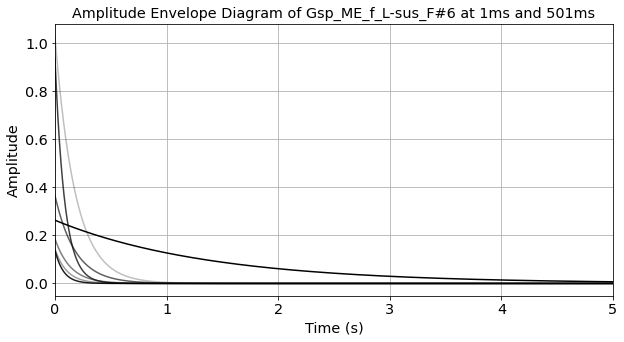

In [122]:
Y1DATAdB = 20*np.log10(np.abs(Y1DATA)/np.max(np.abs(Y1DATA)))
Y2DATAdB = 20*np.log10(np.abs(Y2DATA)/np.max(np.abs(Y1DATA)))
peaks, props = scipy.signal.find_peaks(Y1DATAdB[0:int(len(Y1DATAdB)/2)], height=-22)
freqs = np.arange(len(Y1DATA))/len(Y1DATA)*sound2.frame_rate

fig, ax = plt.subplots()
counter = 0
for ii in peaks:
    amp1 = Y1DATAdB[ii]
    amp2 = Y2DATAdB[ii]
    gamma = (np.log(10)/20)*(amp1-amp2)/(timetotakewindow2_seconds-timetotakewindow1_seconds)
    A = np.power(10,amp1/20)*np.power(10,gamma*timetotakewindow1_seconds/np.log10(np.exp(1)))
    et = np.arange(0,5*sound2.frame_rate)/sound2.frame_rate
    envelope = A*np.exp(-gamma*et)
    plt.plot(et,envelope,color='k',alpha=1-(counter/(len(peaks)+1)))
    counter += 1

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim((0,5))
ax.grid();
plt.title('Amplitude Envelope Diagram of Gsp_ME_f_L-sus_F#6 at 1ms and 501ms')
plt.show()

### Make an additive synthesis of the sound sample you have chosen. Play and write the result to an audio file.

In [123]:
tonedur = 5
N = int(tonedur*sound2.frame_rate)
n = np.arange(N)    
ysum = np.zeros((N,))
for ii in peaks:
    amp1 = np.abs(Y1DATA[ii])
    amp2 = np.abs(Y2DATA[ii])
    m = (amp2-amp1)/(timetotakewindow2_seconds-timetotakewindow1_seconds)
    b = amp1
    et = np.arange(0,N)/sound2.frame_rate
    envelope = m*et+b
    envelope[envelope < 0] = 0 # rectify
    ysum += envelope*np.cos(2*np.pi*freqs[ii]*n/sound2.frame_rate 
                    + np.angle(Y1DATA[ii]))   

# Normalize
ysum /= np.max(np.abs(ysum))
ysum_scaled = np.int16(ysum / np.max(np.abs(ysum)) * (np.power(2,16)/2)) # Make 16-bit

# Save the sound wav file locally
sf.write('generatedSound_Gsp_ME_f_L-sus_F#6.wav', ysum_scaled, sound2.frame_rate, subtype='PCM_16')
print("generatedSound_Gsp_ME_f_L-sus_F#6.wav saved successfully!\n")

# Play Sound
play_obj = sa.play_buffer(ysum_scaled, 1, 2, sound2.frame_rate)
play_obj.wait_done()
print("Finished playing!")

generatedSound_Gsp_ME_f_L-sus_F#6.wav saved successfully!

Finished playing!


# Play a little melody of a few notes just by transposing all the pitches according to some scale.

In [124]:
# Use Gsp_ME_f_L-sus_F#6.wav to make melody with five pitches
tonedur = 1
N = int(tonedur*sound2.frame_rate)
n = np.arange(N)    
ysum1 = np.zeros((N,))
ysum2 = np.zeros((N,))
ysum3 = np.zeros((N,))
ysum4 = np.zeros((N,))
ysum5 = np.zeros((N,))
for ii in peaks:
    amp1 = np.abs(Y1DATA[ii])
    amp2 = np.abs(Y2DATA[ii])
    m = (amp2-amp1)/(timetotakewindow2_seconds-timetotakewindow1_seconds)
    b = amp1
    et = np.arange(0,N)/sound2.frame_rate
    envelope = m*et+b
    envelope[envelope < 0] = 0 # rectify
    ysum1 += envelope*np.cos(2*np.pi*freqs[ii]*2*n/sound2.frame_rate # Change
                    + np.angle(Y1DATA[ii]))  
    ysum2 += envelope*np.cos(2*np.pi*freqs[ii]*3*n/sound2.frame_rate # Change
                    + np.angle(Y1DATA[ii]))  
    ysum3 += envelope*np.cos(2*np.pi*freqs[ii]*4*n/sound2.frame_rate # Change
                    + np.angle(Y1DATA[ii]))  
    ysum4 += envelope*np.cos(2*np.pi*freqs[ii]*5*n/sound2.frame_rate # Change
                    + np.angle(Y1DATA[ii]))  
    ysum5 += envelope*np.cos(2*np.pi*freqs[ii]*6*n/sound2.frame_rate # Change
                    + np.angle(Y1DATA[ii]))  

# Normalize
ysum1 /= np.max(np.abs(ysum))
ysum2 /= np.max(np.abs(ysum))
ysum3 /= np.max(np.abs(ysum))
ysum4 /= np.max(np.abs(ysum))
ysum5 /= np.max(np.abs(ysum))
ysum = np.concatenate((ysum1, ysum2, ysum3, ysum4, ysum5))
ysum_scaled = np.int16(ysum / np.max(np.abs(ysum)) * (np.power(2,16)/2)) # Make 16-bit

# Save the sound wav file locally
sf.write('Serial_generatedMelody_Gsp_ME_f_L-sus_F#6.wav', ysum_scaled, sound2.frame_rate, subtype='PCM_16')
print("Serial_generatedMelody_Gsp_ME_f_L-sus_F#6.wav saved successfully!\n")

# Play Sound
play_obj = sa.play_buffer(ysum_scaled, 1, 2, sound2.frame_rate)
play_obj.wait_done()
print("Finished playing!")

Serial_generatedMelody_Gsp_ME_f_L-sus_F#6.wav saved successfully!

Finished playing!
